<a href="https://colab.research.google.com/github/Likelipop/Question-generator/blob/main/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load SQUAD

In [1]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("rajpurkar/squad")

In [2]:
ds["train"]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [40]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
splits = {'train': 'plain_text/train-00000-of-00001.parquetsplits', 'validation': 'plain_text/validation-00000-of-00001.parquet'}
df1 = pd.DataFrame(ds["train"])
df1["split"] = "train"
df2 = pd.DataFrame(ds["validation"])
df2["split"] = "test"

df = pd.concat([df1,df2])


In [41]:
df.iloc[1].answers

{'text': ['a copper statue of Christ'], 'answer_start': [188]}

In [42]:

df

,id,title,context,question,answers,split
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",train
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",train
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",train
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,train
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,train
...,...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,"The pound-force has a metric counterpart, less...",What is the metric term less used than the New...,"{'text': ['kilogram-force', 'pound-force', 'ki...",test
10566,5737aafd1c456719005744fc,Force,"The pound-force has a metric counterpart, less...",What is the kilogram-force sometimes reffered ...,"{'text': ['kilopond', 'kilopond', 'kilopond', ...",test
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,"{'text': ['slug', 'metric slug', 'metric slug'...",test
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,"{'text': ['kip', 'kip', 'kip', 'kip', 'kip'], ...",test


# Preprocessing

In [47]:
df[["answer_text", "answer_start"]] = df["answers"].apply(pd.Series)

# EDA

## Check for nullity

In [49]:
df.isna().sum()

,0
id,0
title,0
context,0
question,0
answers,0
split,0
answer_text,0
answer_start,0


## Extract statistical information

In [50]:
# see the context_length distributions
stat_context_lengths = df["context"].str.len().value_counts()
stat_context_lengths

,count
context,
597,301
532,287
749,280
582,276
516,274
...,...
345,3
331,3
1486,2


In [51]:
# see the context_length distributions
stat_question_lengths = df["question"].str.len().value_counts()
stat_question_lengths

,count
question,
46,2097
50,2070
54,2065
47,2052
51,2032
...,...
25651,1
179,1
173,1


In [52]:
# see the number of answer for each questions
df["num_ans"] = df.answer_text.apply(lambda x: len(x))
stat_number_answers = df["num_ans"].value_counts()
stat_number_answers

,count
num_ans,
1,87602
3,8490
5,1147
4,759
2,136
6,35


In [53]:
# see the distribution of answer length
stat_answer_lengths =  df["answer_text"].explode().str.len().value_counts()
stat_answer_lengths

,count
answer_text,
4,9971
7,5382
12,5277
11,5161
6,5134
...,...
167,1
181,1
170,1


## Visualization

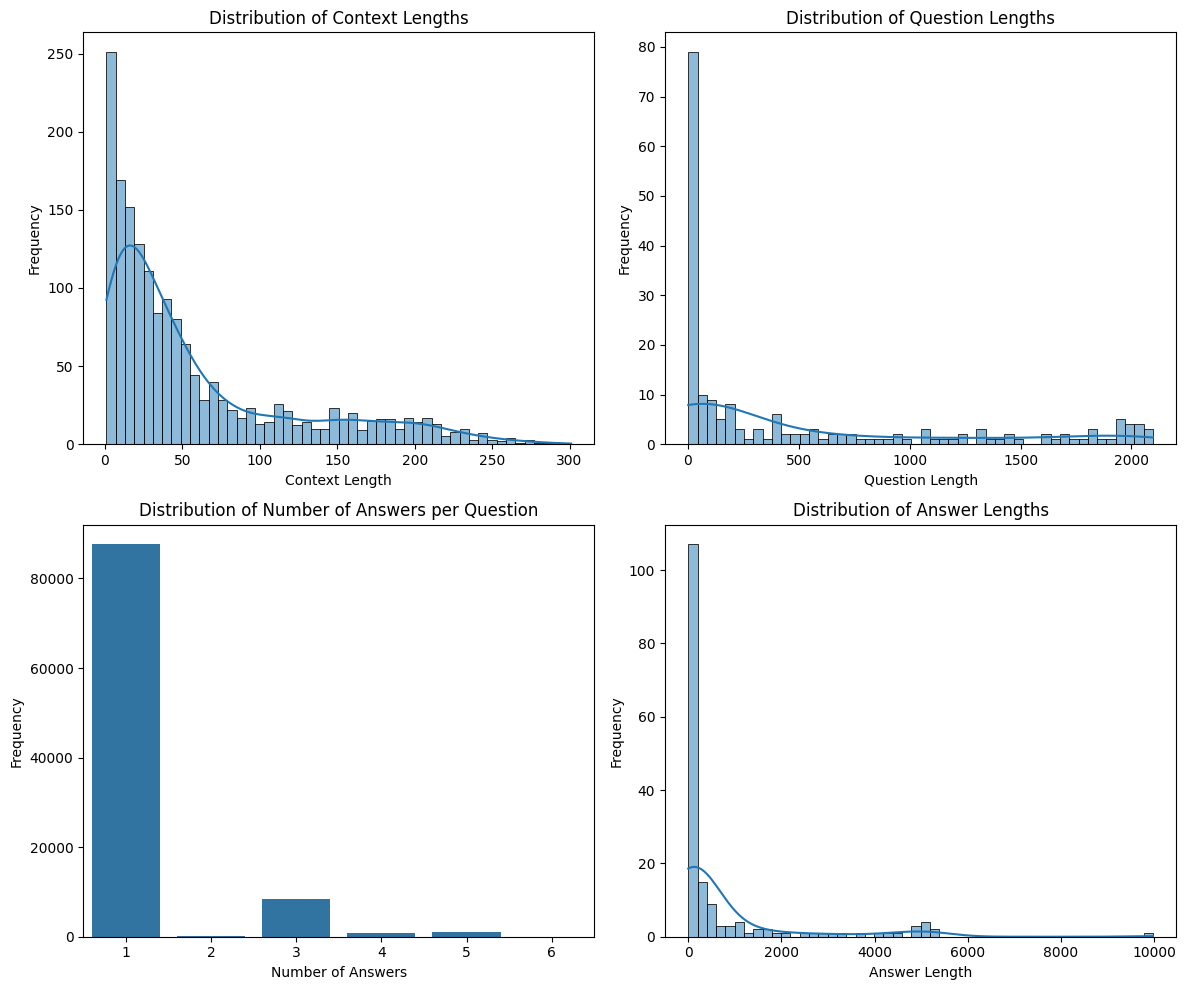

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10)) # Adjusted size for better visibility

# --- Subplot 1 (Top-Left) ---
plt.subplot(2, 2, 1) # (rows, columns, index)
sns.histplot(stat_context_lengths, kde=True, bins=50)
plt.title('Distribution of Context Lengths')
plt.xlabel('Context Length')
plt.ylabel('Frequency')

# --- Subplot 2 (Top-Right) ---
plt.subplot(2, 2, 2)
sns.histplot(stat_question_lengths, kde=True, bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')

# --- Subplot 3 (Bottom-Left) ---
plt.subplot(2, 2, 3)
# Note: Ensure stat_number_answers is iterable and has a max() method
sns.barplot(stat_number_answers)
plt.title('Distribution of Number of Answers per Question')
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')

# --- Subplot 4 (Bottom-Right) ---
plt.subplot(2, 2, 4)
sns.histplot(stat_answer_lengths, kde=True, bins=50)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# 2. Show the entire figure with all subplots at once
plt.show()

# Preprocess 2

In [55]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [56]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [73]:
def preprocess_function(examples):
    # Lấy dữ liệu context, answer, question
    contexts = examples["context"]
    answers = [a["text"][0] for a in examples["answers"]]
    questions = examples["question"]

    # Tạo input cho mô hình seq2seq QG
    inputs = [
        f"generate question: {ctx} answer: {ans}"
        for ctx, ans in zip(contexts, answers)
    ]

    # Tokenize đầu vào
    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding="max_length"
    )

    # Tokenize đầu ra (question)
    labels = tokenizer(
        questions,
        max_length=64,
        truncation=True,
        padding="max_length"
    )

    model_inputs["labels"] = labels["input_ids"]

    return model_inputs


In [74]:
tokenized_squad = ds.map(preprocess_function, batched=True, remove_columns=ds["train"].column_names)

Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [71]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

# Model

In [75]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Trainer, TrainingArguments
from datasets import load_dataset
import torch

model_name = "google/mt5-small"  # hoặc "vinai/bartpho-word" nếu muốn BARTpho
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)



tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [78]:
training_args = TrainingArguments(
    output_dir="./qg-model",
    eval_steps=500,
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=5e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=torch.cuda.is_available(),  # if GPU supports
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_squad["train"],
    eval_dataset=tokenized_squad["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)
